In [1]:
#1
import numpy as np
import matplotlib.pyplot as plt
a=3
b=2
n=10000
s=np.random.weibull(a,n)*b
print(s)

[2.47276739 0.61996251 2.39111406 ... 1.36526068 0.76294667 2.56737416]


In [2]:
#2.1
mid=np.mean(s)
print("Выборочное среднее выборки: ", mid)

Выборочное среднее выборки:  1.7894146185864328


In [3]:
from scipy.special import gamma
estimation_b=mid/gamma(1+1/a)   
print("Oценка параметра b при n=: ", estimation_b)

Oценка параметра b при n=:  2.003869736542849


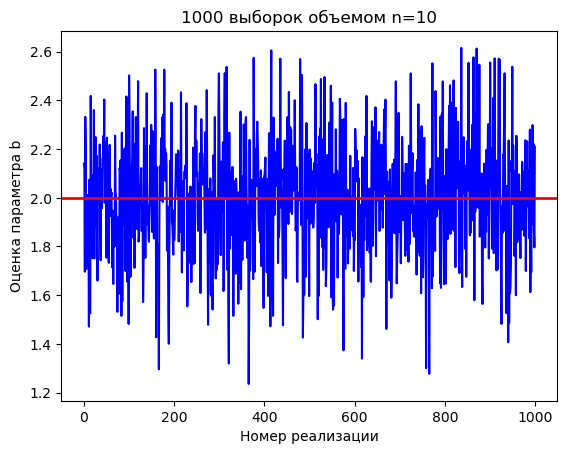

In [4]:
def graf(n):
    estimations=[]
    for i in range(1000):
        s=np.random.weibull(a,n)*b
        mid=np.mean(s)
        estimation_b=mid/gamma(1+1/a) 
        estimations.append(estimation_b)
    plt.plot(estimations,color='blue')
    plt.xlabel('Номер реализации')
    plt.axhline(y=b, color='red', linewidth=2)
    plt.ylabel('Оценка параметра b')
    plt.title('1000 выборок объемом n='+str(n))
graf(10)

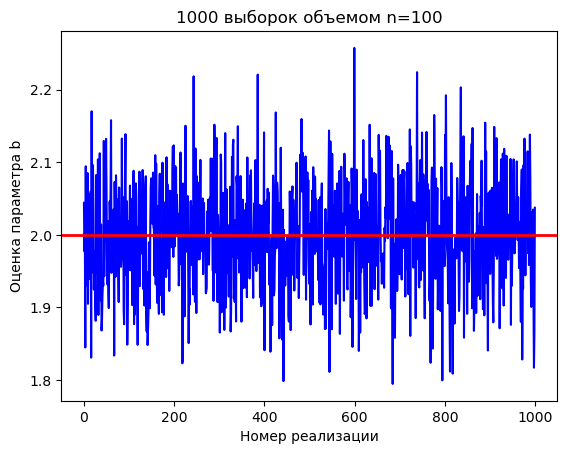

In [5]:
graf(100)

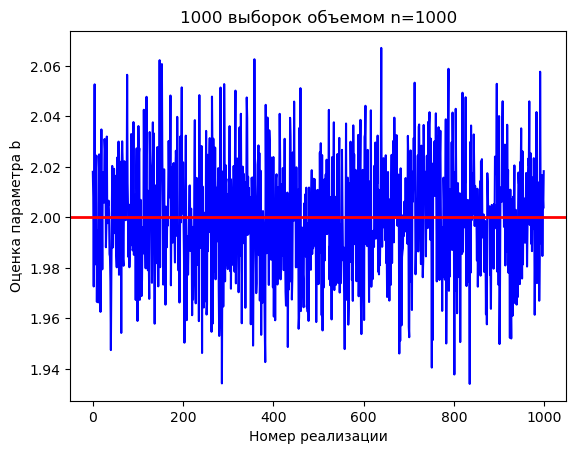

In [6]:
graf(1000)

Text(0.5, 1.0, 'График логарифма функции правдоподобия от параметра b')

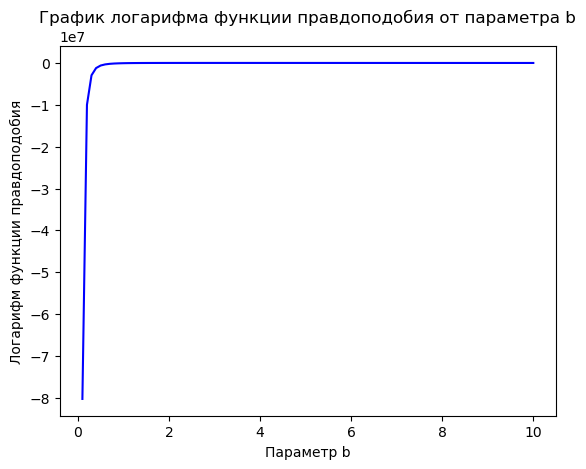

In [7]:
#2.2
# Функция правдоподобия для распределения Вейбула — это функция плотности вероятностей (pdf), рассматриваемая как функция от параметров.

import math

# логарифм функции правдоподобия
def log_likelihood(b, a, data):
    return n*np.log(a) - n*np.log(b) + (a-1)*np.sum(np.log(data)) - np.sum((data/b)**a)

b_values = np.linspace(0.1, 10, 100)  # Задаем диапазон значений параметра b
log_likelihood_values = [log_likelihood(b_val, a, s) for b_val in b_values]  # Вычисляем значения функции логарифма правдоподобия

plt.plot(b_values, log_likelihood_values, color='blue')
plt.xlabel('Параметр b')
plt.ylabel('Логарифм функции правдоподобия')
plt.title('График логарифма функции правдоподобия от параметра b')

In [8]:
ind=log_likelihood_values.index(max(log_likelihood_values)) # индекс максимума
print(b_values[ind])

2.9000000000000004


In [30]:
s=np.random.weibull(a,n)*b
def graf2(n, e):
    estimations=[]
    for i in range(1000):
        s=np.random.weibull(a,n)*b
        estimation_b=(1/n)*np.sum(s)
        estimations.append(estimation_b)
    plt.plot(estimations,color='blue')
    plt.xlabel('Номер реализации')
    plt.axhline(y=e, color='red', linewidth=2)
    plt.ylabel('Оценка параметра b')
    plt.title('1000 выборок объемом n='+str(n))
estimation_b=(1/n)*np.sum(s)
print(estimation_b)

3.0230598968781335


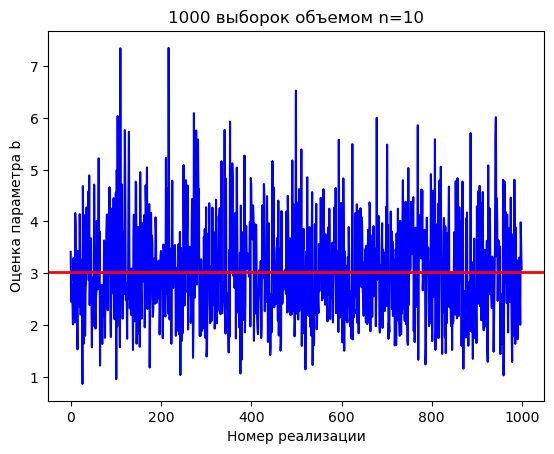

In [31]:
graf2(10, estimation_b)

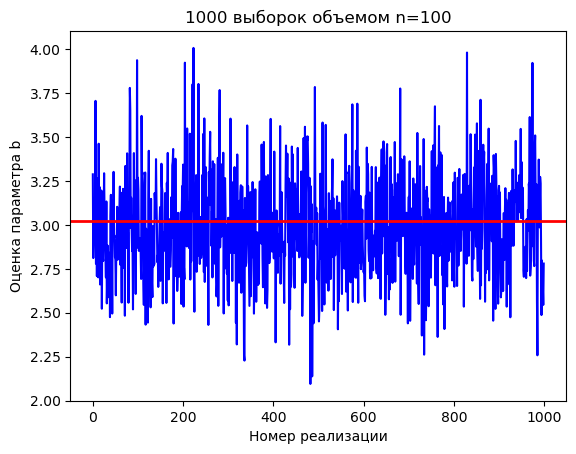

In [32]:
graf2(100, estimation_b)

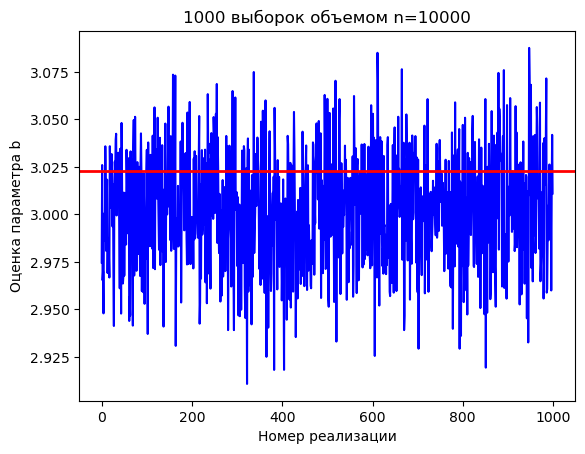

In [33]:
graf2(10000, estimation_b)

In [16]:
#2.3
estimations_b=[]
for i in range(100):
    a=1
    b=3
    n=10000
    s=np.random.weibull(a,n)*b
    mid=np.mean(s)
    estimations_b.append(mid/gamma(1+1/a))    # оценка параметра b
    
disp=np.var(estimations_b)    # дисперсия
print('Дисперсия оценки параметра: ',disp)
bias = np.mean(estimations_b) - b    # смещение
print('Смещение оценки параметра: ',bias)
mse=np.mean([(estimation-b)**2 for estimation in estimations_b])  # рассеяние
print('Рассеяние оценки параметра: ',mse)

Дисперсия оценки параметра:  0.0005789798243942603
Смещение оценки параметра:  -0.0025240167313387296
Рассеяние оценки параметра:  0.0005853504848543395


In [17]:
#3.1-3.2
import math

xmax=max(s)
xmin=min(s)
r=int(1+3.322*np.log10(n))   # к-во интервалов
h=(xmax-xmin)/r    # шаг
print(r)
print(h)

14
2.3073799924733


In [18]:
borders=[]   # массив границ интервалов
for i in range(r+1):
    borders.append(xmin+i*h)
print(len(borders), borders)

15 [0.00031173257527289464, 2.307691725048573, 4.615071717521873, 6.9224517099951735, 9.229831702468474, 11.537211694941774, 13.844591687415074, 16.151971679888373, 18.459351672361674, 20.766731664834975, 23.074111657308276, 25.381491649781573, 27.688871642254874, 29.996251634728175, 32.30363162720147]


In [19]:
countElements=[0]*r    # к-во значений на каждом из интервалов группировки
for value in s:
    for i in range(r):
        if borders[i] <= value < borders[i+1]:
            countElements[i]+=1
            break
print(countElements)

[5329, 2482, 1155, 527, 267, 128, 61, 21, 11, 12, 2, 4, 0, 0]


In [20]:
count=[]
for i in range(r):
    count.append(countElements[i]/(h*n))
print(count)

[0.23095458994111326, 0.10756789120545, 0.05005677451341449, 0.02283975772170514, 0.011571566056347765, 0.005547417435252861, 0.0026436911214876915, 0.0009101231729711725, 0.00047673118584204275, 0.0005200703845549557, 8.667839742582596e-05, 0.00017335679485165192, 0.0, 0.0]


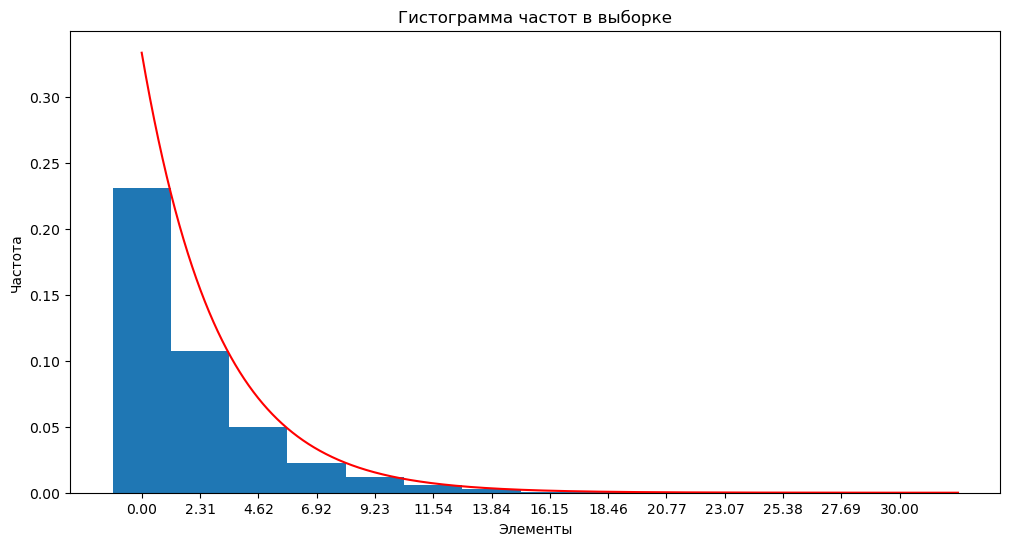

In [21]:
plt.figure(figsize=(12,6))
plt.bar(borders[:-1], count, width=h)
plt.xticks(borders[:-1])
plt.xlabel('Элементы')
plt.ylabel('Частота')
plt.title('Гистограмма частот в выборке')

from scipy.stats import weibull_min

x=np.linspace(xmin,xmax,n)  # теоретическое распределение
pdf = weibull_min.pdf(x, a, loc=0, scale=b)   # теоретическая плотность вероятности распределения Вейбулла

plt.plot(x, pdf,'r')  #график плотности вероятности

plt.show()

In [22]:
#3.3
def graf3(N):
    a=1
    b=3
    n=10000
    s=np.random.weibull(a,n)*b

    mod=np.mean(s)
    estimation_b=mid/gamma(1+1/a)
    xmax=max(s)
    xmin=min(s)

    r=int(1+3.322*np.log10(n))   # к-во интервалов
    h=(xmax-xmin)/r    # шаг
    
    borders=[]   # массив границ интервалов
    for i in range(r+1):
        borders.append(xmin+i*h)

    countElements=[0]*r    # к-во значений на каждом из интервалов группировки
    for value in s:
        for i in range(r):
            if borders[i] <= value < borders[i+1]:
                countElements[i]+=1
                break

    count=[]
    for i in range(r):
        count.append(countElements[i]/(h*n))


    plt.figure(figsize=(12,6))
    plt.bar(borders[:-1], count, width=h,label='Гистограмма частот')
    plt.xticks(borders[:-1])
    plt.xlabel('Элементы')
    plt.ylabel('Частота')
    plt.title('Гистограмма частот в выборке при n= %d' % (N))

    from scipy.stats import weibull_min

    x=np.linspace(xmin,xmax,n)  # теоретическое распределение
    pdf = weibull_min.pdf(x, a, loc=0, scale=b)   # теоретическая плотность вероятности распределения Вейбулла
    pdf2 = weibull_min.pdf(x, a, loc=0, scale=estimation_b)

    plt.plot(x, pdf,'r',label='плотность теоретического распределения')  #график плотности вероятности
    plt.plot(x, pdf2,'g',label='плотность теоретического распределения с оценкой вместо параметра')

    plt.legend()   

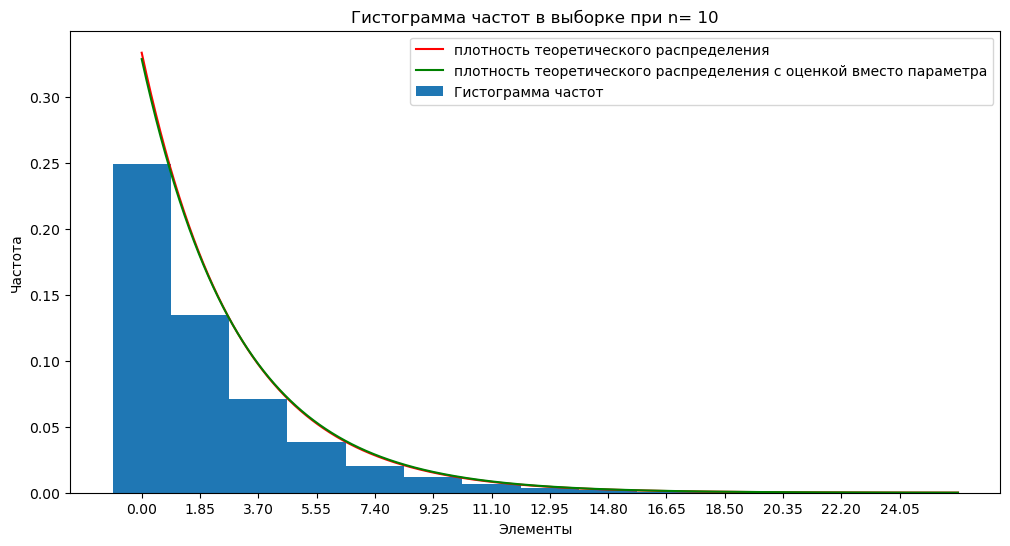

In [23]:
graf3(10)

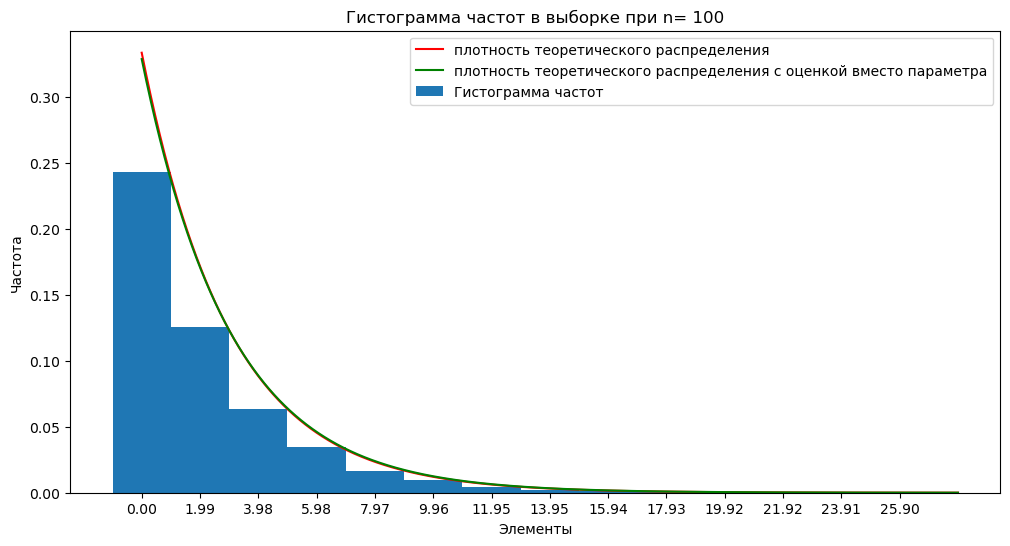

In [24]:
graf3(100)

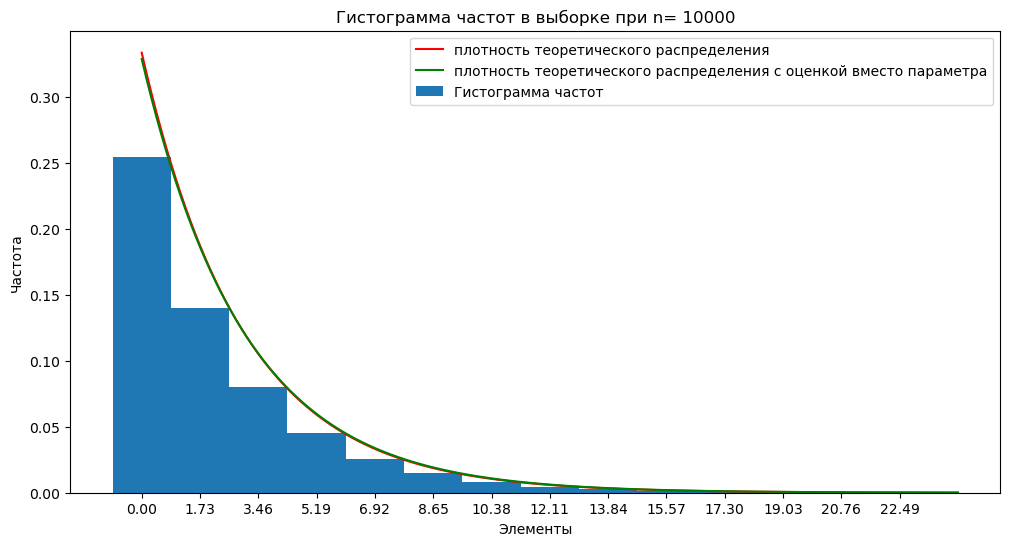

In [25]:
graf3(10000)

In [26]:
#4
def graf4(n):
    s_sorted=np.sort(s)
    def emperical_cdf(data_point, data):
        c=0
        ok=False
        for d in data:
            if d<=data_point:
                c+=1
                ok=True
            elif ok==True:
                break            
        return c/len(data)

    x=np.unique(s_sorted)
    y=[emperical_cdf(s_point, s_sorted) for s_point in x]
        
    plt.figure(figsize=(12,6))
    plt.step(x, y, label='Эмпирическая ФР для негруппированных данных')

    x=np.linspace(xmin,xmax,n)
    cdf=weibull_min.cdf(x, a, loc=0, scale=b)
    plt.plot(x,cdf,'r',label='Теоретическая ФР')
    cdf2=weibull_min.cdf(x, a, loc=0, scale=estimation_b)
    plt.plot(x,cdf2,'g',label='Теоретическая ФР с оценкой параметра')
    plt.legend()

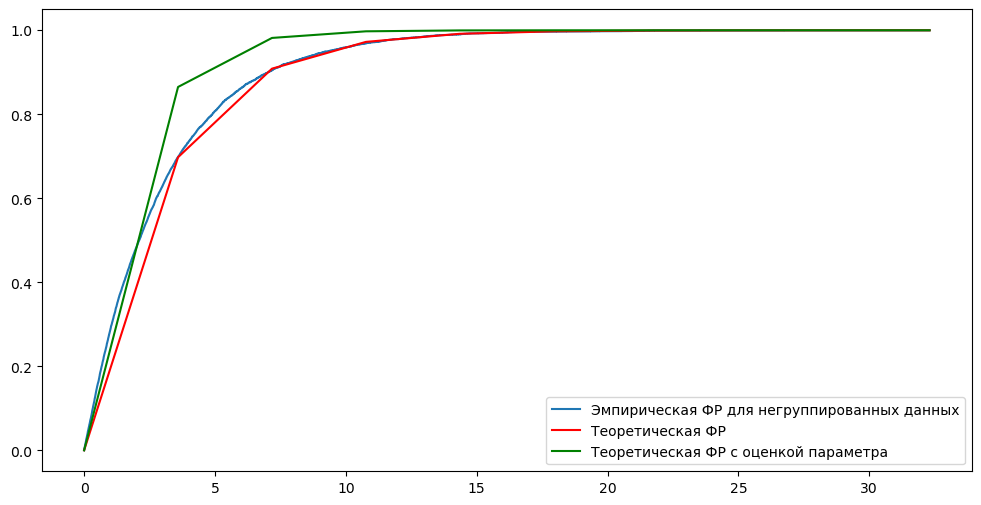

In [27]:
graf4(10)

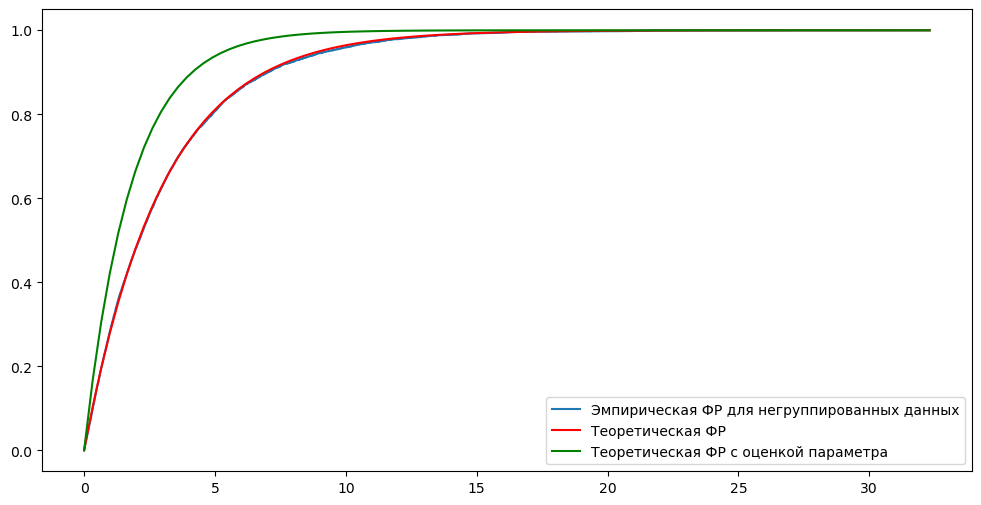

In [28]:
graf4(100)

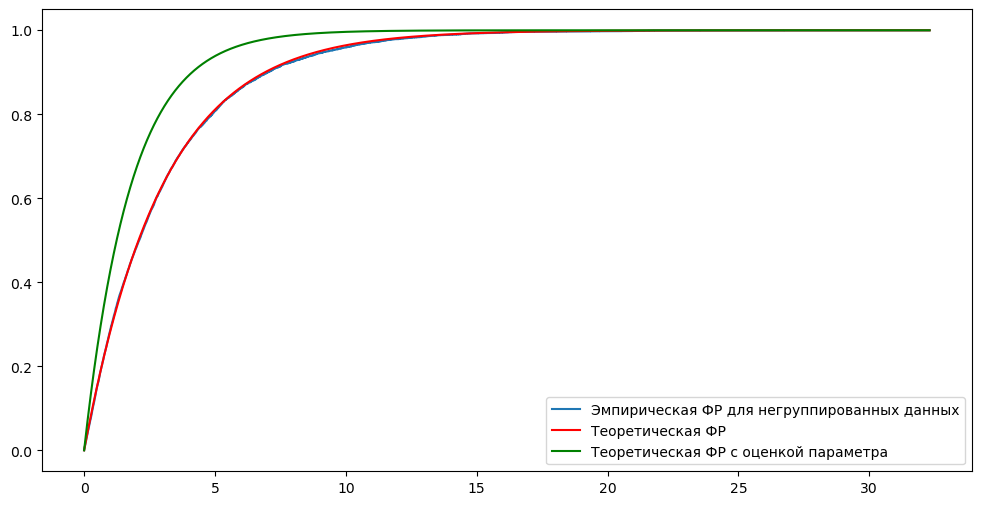

In [29]:
graf4(10000)